<a href="https://colab.research.google.com/github/MaddalenaDona/Possible-counter-intuitive-impact-of-local-vaccine-mandates-for-vaccine-preventable-infectious-disea/blob/main/Figure_4_and_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

the crossing between $p_{me}$ and $p_{wm}$ when $R_0=15$ is for $\pi=$ 0.2048048048048048
the crossing between $p_{me}$ and $p_{wm}$ when $R_0=6$ is for $\pi=$ 0.18278278278278276


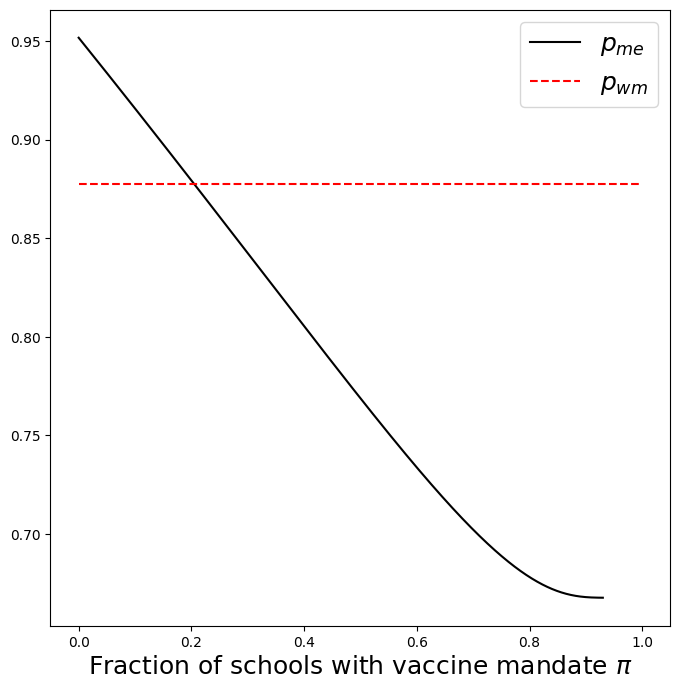

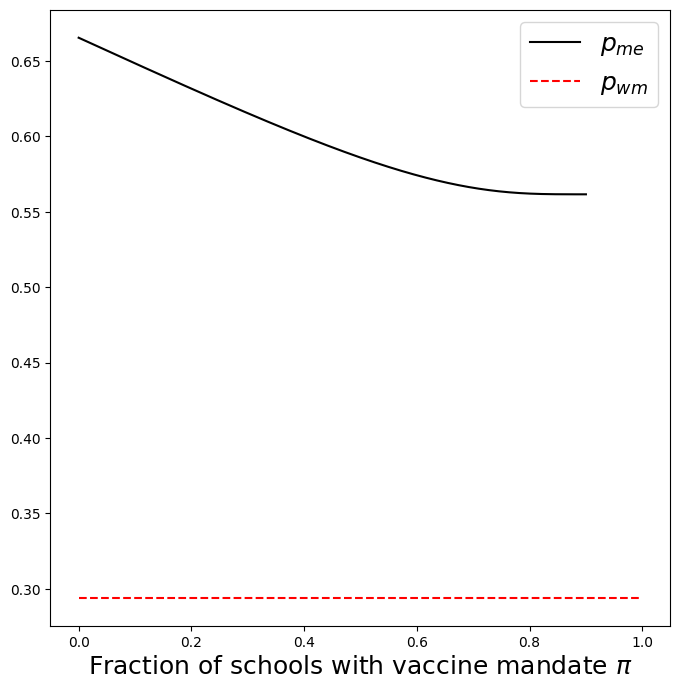

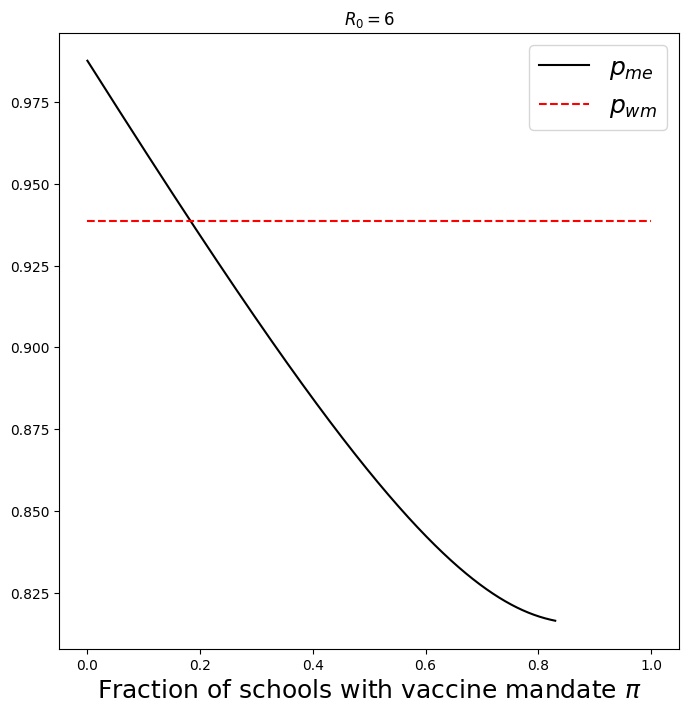

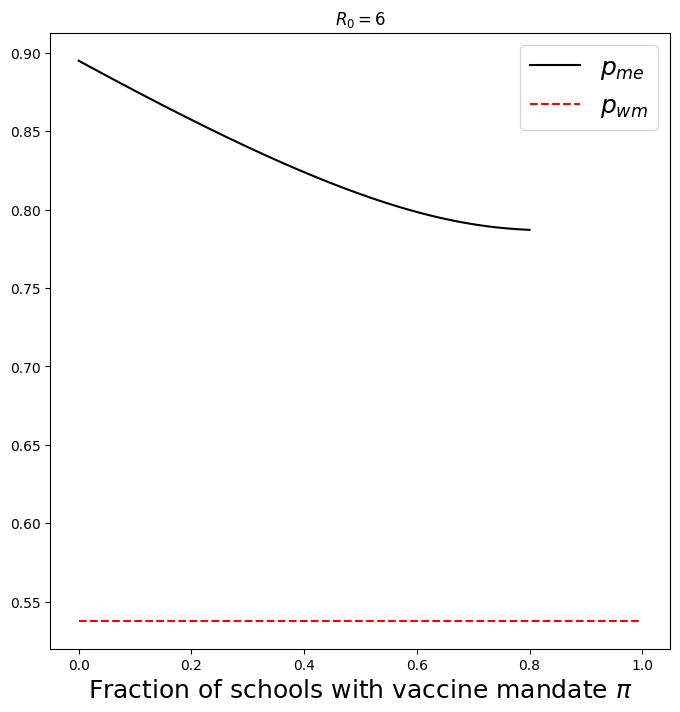

In [11]:
from numpy.lib.function_base import kaiser
import numpy as np
from scipy import optimize
import math
import numpy as np
import matplotlib.pyplot as plt

#definition of a function to compute $p_{me}$ as solution of a fixed point equation
def f(x, v, pi, R0):
  u=(1-v)/(1-pi)
  z=x*(x*u+1-u)**(nc-1) #\Bar{q} in paper's notation
  lambdaG=(R0**2)/(R0+nc-1) #rate of global contacts
  return np.exp(-lambdaG*(1-v)*(1-z))


#definition of a function to compute $p_{wm}$
def fun(x, v):
  q=x*(x*(1-v)+v)**(nc-1)
  return q


#plots with R0=15
v=0.93 #set fraction of vaccinated
pi=np.linspace(0,v,1000) #fraction of schools with vaccine mandate
nc=25 #number of students per class
# we want to compute $p_{me}$ (=prob that a medically exepmt avoids infection) with v fixed and pi variable
# First we compute X as the solution of the fixed point equation defined above. The i-th element of X is
# the probability $p_{me}$ computed with v and pi[i]. So X[0] is $p_{me}|_{\pi=0}$.
# to compute the probability $p_{wm}$ then we can use fun evaluated in X[0],v
X=[]
for i in range(len(pi)):
  X.append(optimize.fixed_point(f, 0.5, args=(v,pi[i],15))) #solves the fixed point equation
Y=fun(X[0],v) # note: this Y is a value, not a vector

#Checking for crossing point between p_me and p_wm:
i=0
while X[i]>Y and X[i+1]>Y:
  i+=1
print(r'the crossing between $p_{me}$ and $p_{wm}$ when $R_0=15$ is for $\pi=$',pi[i])
#the crossing is at around 0.20


plt.figure(figsize=(8,8))
plt.plot(pi,X,'k', label=r'$p_{me}$')
plt.hlines(y = Y, xmin= 0, xmax= 1, color = 'r', linestyle = '--', label=r'$p_{wm}$')
plt.xlabel('Fraction of schools with vaccine mandate $\pi$', fontsize=18)
plt.legend(fontsize=18)


v2=0.90 #set fraction of vaccinated (it was 0.93 in the previous plot)
pi=np.linspace(0,v2,1000)
X=[]
for i in range(len(pi)):
  X.append(optimize.fixed_point(f, 0.5, args=(v2,pi[i],15)))
Y=fun(X[0],v2)


plt.figure(figsize=(8,8))
plt.plot(pi,X,'k', label=r'$p_{me}$')
plt.hlines(y = Y, xmin= 0, xmax= 1, color = 'r', linestyle = '--', label=r'$p_{wm}$')
plt.xlabel('Fraction of schools with vaccine mandate $\pi$', fontsize=18)
plt.legend(fontsize=18)





#plots with R0=6------------------------------------------------------------------
v=0.83 #set fraction of vaccinated
pi=np.linspace(0,v,1000) #fraction of schools with vaccine mandate
nc=25 #number of students per class
# we want to compute $p_{me}$ (=prob that a medically exepmt avoids infection) with v fixed and pi variable
# First we compute X as the solution of the fixed point equation defined above. The i-th element of X is
# the probability $p_{me}$ computed with v and pi[i]. So X[0] is $p_{me}|_{\pi=0}$.
# to compute the probability $p_{wm}$ then we can use fun evaluated in X[0],v
X=[]
for i in range(len(pi)):
  X.append(optimize.fixed_point(f, 0.5, args=(v,pi[i],6))) #solves the fixed point equation
Y=fun(X[0],v) # note: this Y is a value, not a vector


plt.figure(figsize=(8,8))
plt.plot(pi,X,'k', label=r'$p_{me}$')
plt.hlines(y = Y, xmin= 0, xmax= 1, color = 'r', linestyle = '--', label=r'$p_{wm}$')
plt.xlabel('Fraction of schools with vaccine mandate $\pi$', fontsize=18)
plt.title('$R_0=6$')
plt.legend(fontsize=18)

#Checking for crossing point between p_me and p_wm:
i=0
while X[i]>Y and X[i+1]>Y:
  i+=1
print(r'the crossing between $p_{me}$ and $p_{wm}$ when $R_0=6$ is for $\pi=$',pi[i])
#the crossing is at around 0.18



v2=0.80 #set fraction of vaccinated (it was 0.93 in the previous plot)
pi=np.linspace(0,v2,1000)
X=[]
for i in range(len(pi)):
  X.append(optimize.fixed_point(f, 0.5, args=(v2,pi[i],6)))
Y=fun(X[0],v2)


plt.figure(figsize=(8,8))
plt.plot(pi,X,'k', label=r'$p_{me}$')
plt.hlines(y = Y, xmin= 0, xmax= 1, color = 'r', linestyle = '--', label=r'$p_{wm}$')
plt.xlabel('Fraction of schools with vaccine mandate $\pi$', fontsize=18)
plt.title('$R_0=6$')
plt.legend(fontsize=18)